In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/survey lung cancer.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


<h2 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> Load Dataset:</h2>

In [ ]:
df= pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(309, 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations:</h3>
Dataset have 309rows and 16 columns.

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>

* Only the 'LUNG_CANCER' column, which we have to predict is of object datatype.
* There are a total of 14 columns which are of init datatype.
* And Gender column is of object datatype

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<h2 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> Data Analysis:</h2>

<Axes: >

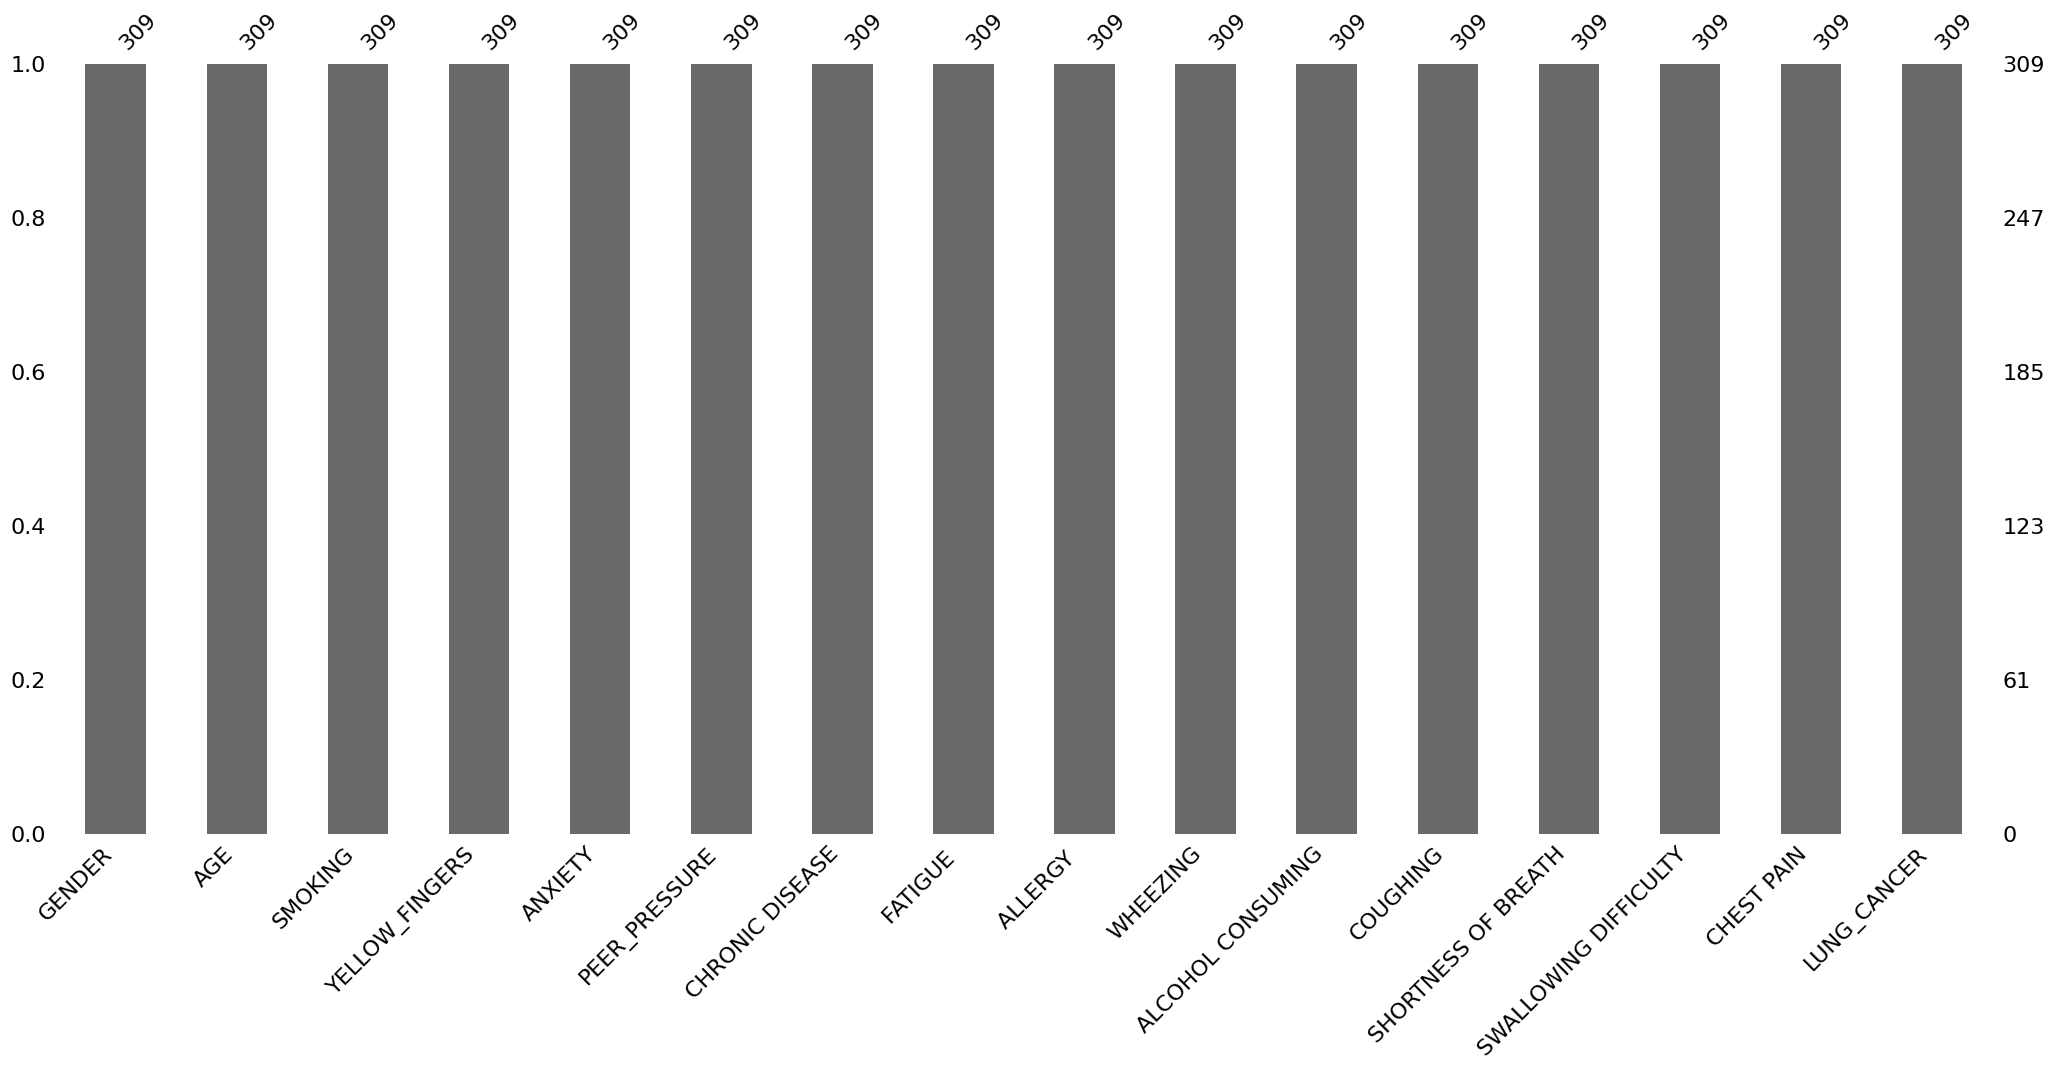

In [ ]:
msno.bar(df)

In [ ]:
df.GENDER.replace({"M":1,"F":0},inplace=True)
df.GENDER.unique()

array([1, 0])

In [ ]:
df.LUNG_CANCER.replace({"YES":1,"NO":0},inplace=True)
df.LUNG_CANCER.unique()

array([1, 0])

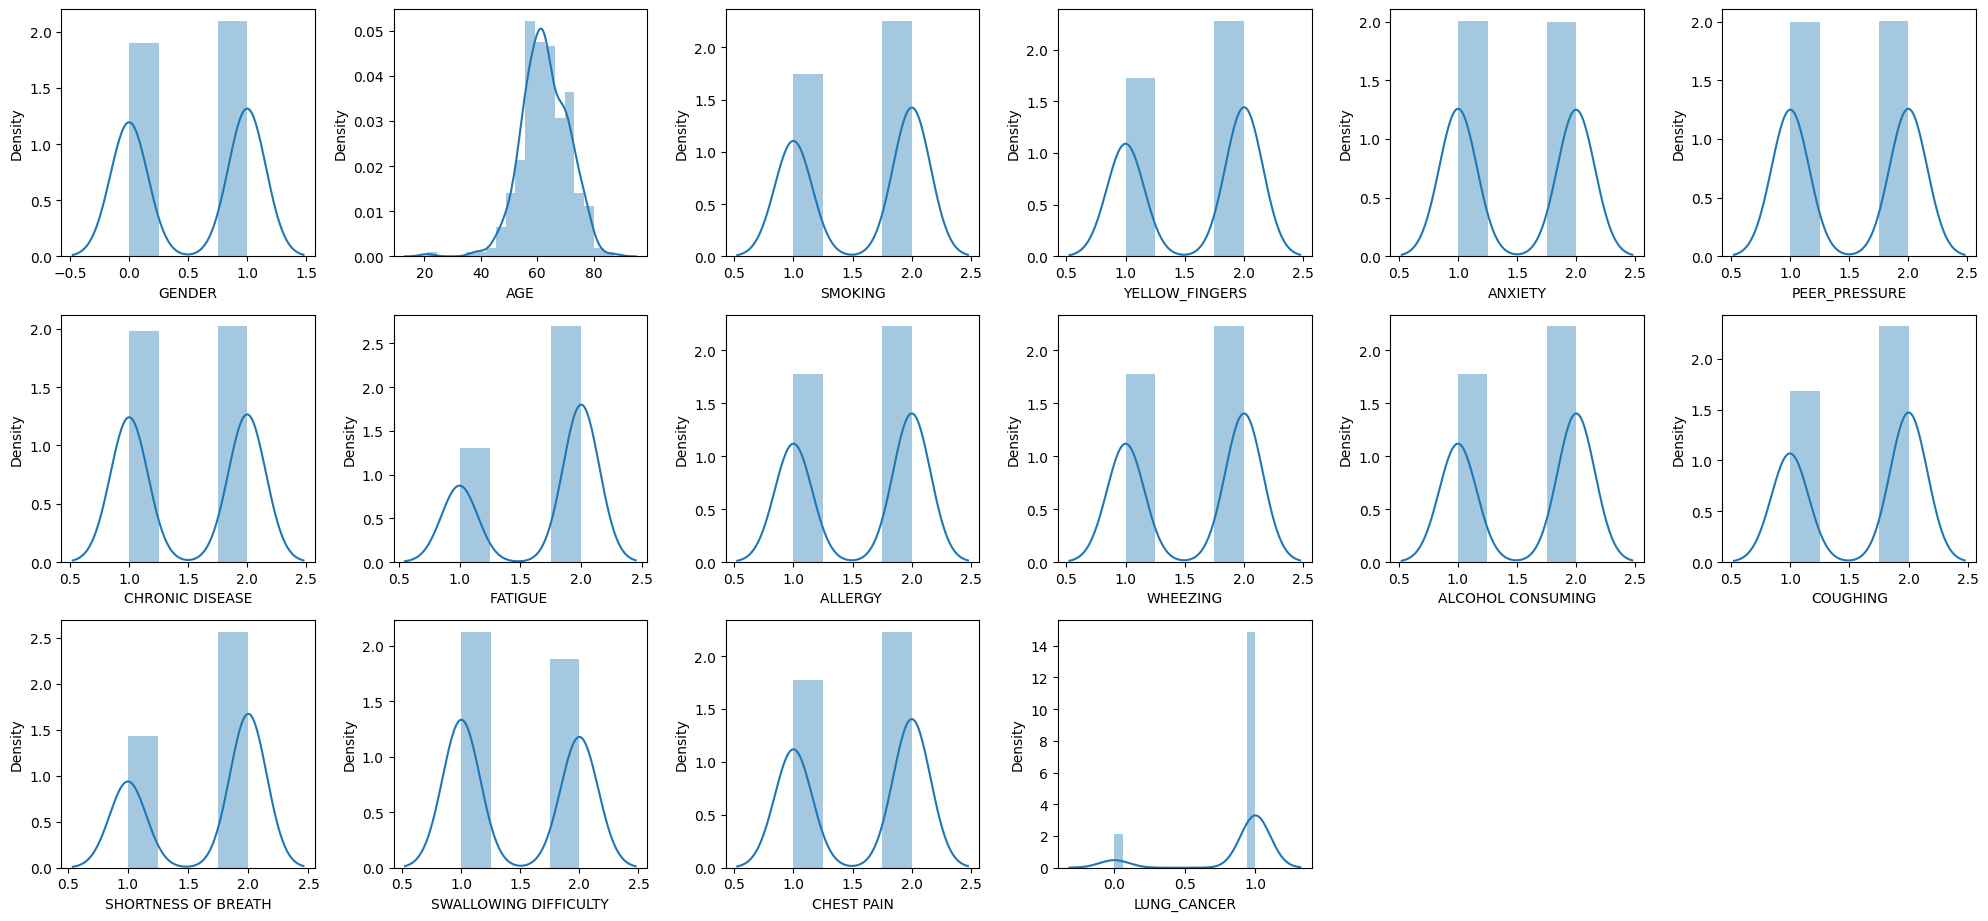

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

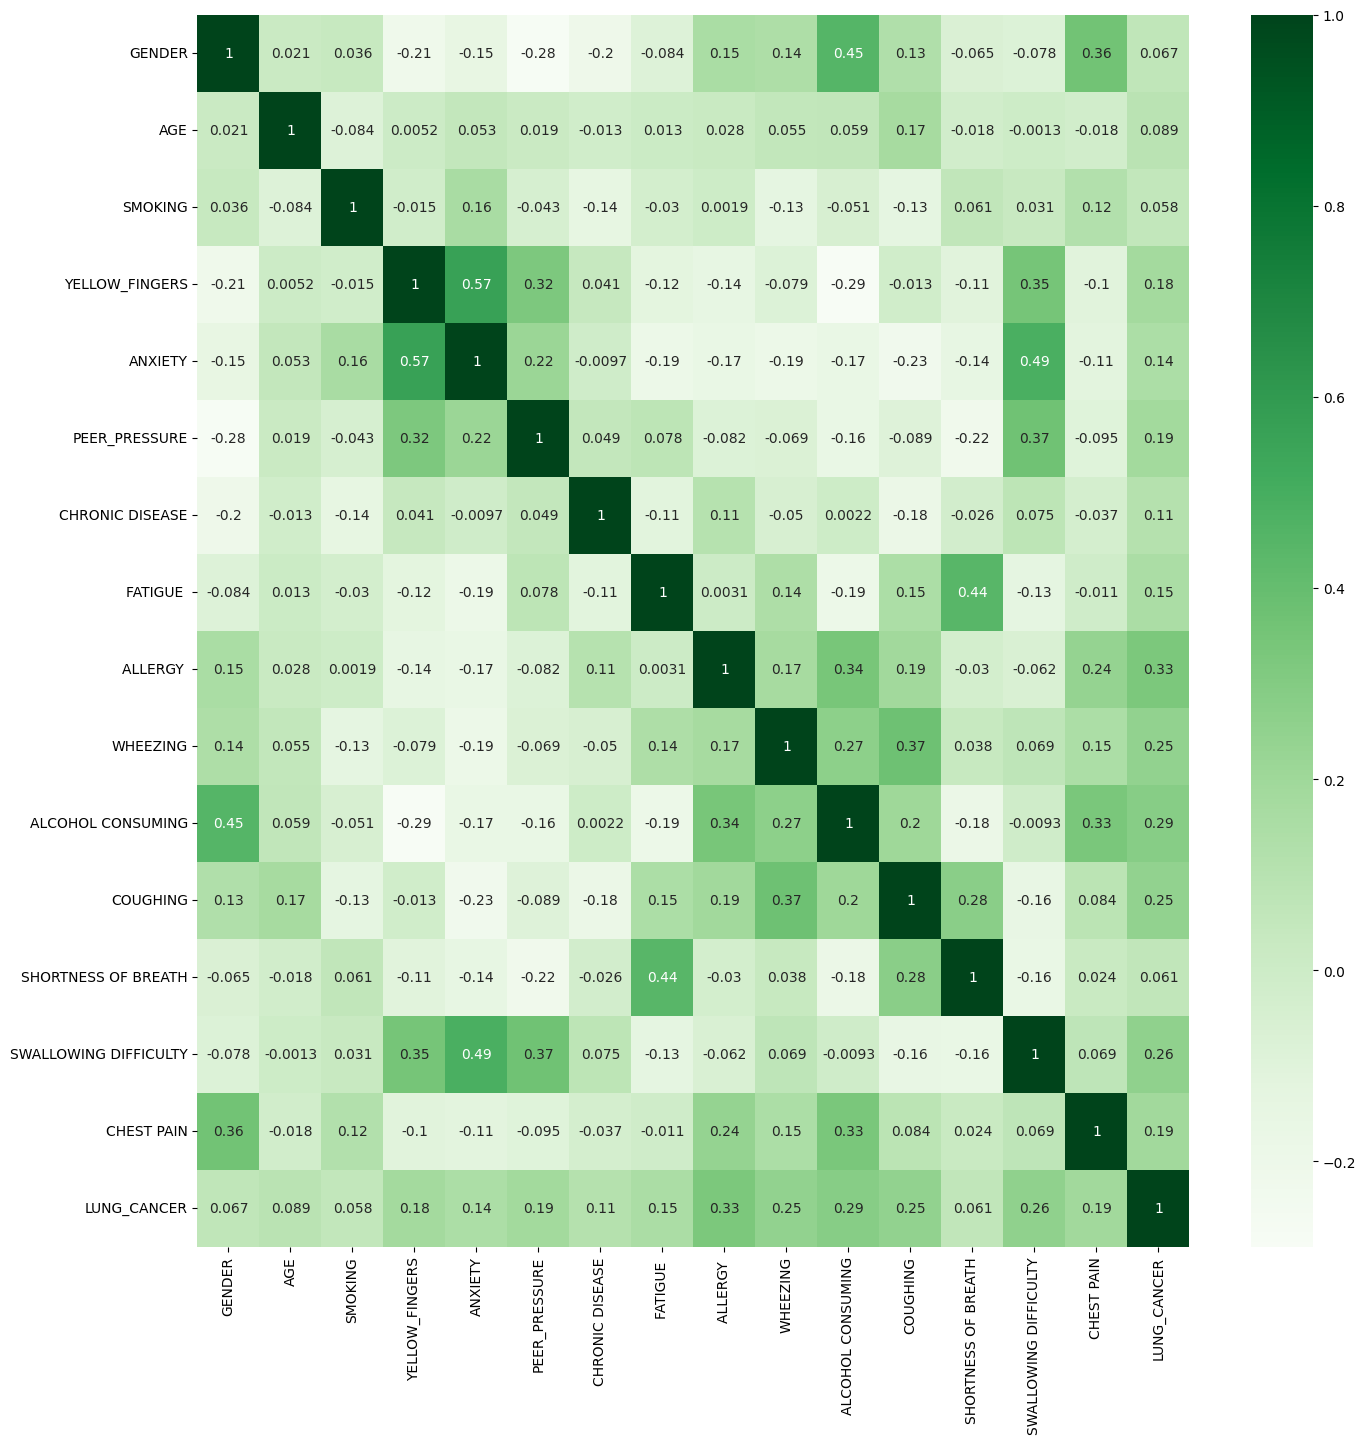

In [ ]:
#Cor plot
df['LUNG_CANCER'] = df['LUNG_CANCER'].factorize(['NO','YES'])[0] # Change data type of target variable
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations:</h3>
There aren't a lot of strong correlations among the different features except maybe some minor ones such as:

- More anxiety leads to more difficulty in breathing
- More anxiety causes yellow fingers or it could be vice versa as any kind of changes in - - body may lead to increased anxiety
- Shortness of breath causes fatigue
- Increased anxiety makes it more difficult to swallow

However, there isn't a lot of correlation between the symptoms and the target variable and this could be because of the type of data or surveyors.

<Axes: ylabel='LUNG_CANCER'>

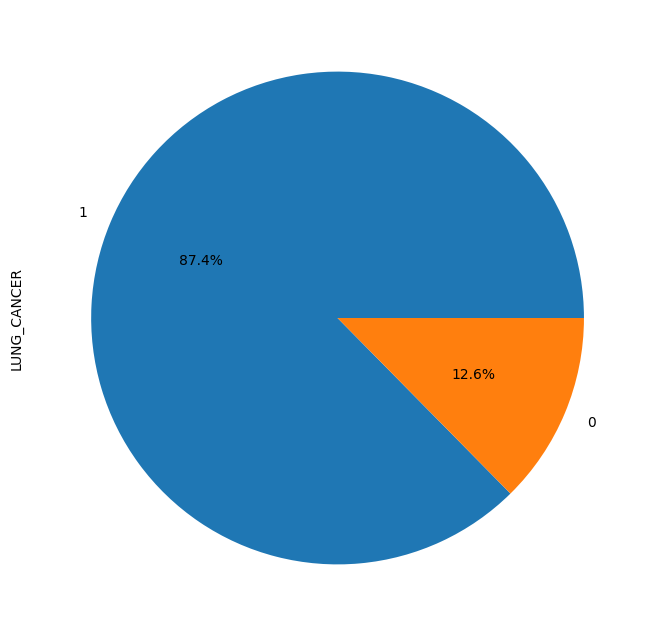

In [ ]:
df.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

**More smokers in the dataset compared to non smokers.**

In [ ]:
100. * df.LUNG_CANCER.value_counts() / len(df.LUNG_CANCER)

1    87.378641
0    12.621359
Name: LUNG_CANCER, dtype: float64

**More than 87% of the surveyors were diagnosed with lung cancer. Only the other ~ 13% were not.**

In [ ]:
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X.shape


(309, 15)

In [ ]:
y.shape

(309,)

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> MODEL BUILDING:</h3>

**Following steps are involved in the model building**

* Initialising the ANN

* Defining by adding layers

* Compiling the ANN

* Train the ANN

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> The Sequential Model:</h3>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'normal', activation = 'relu', input_dim = 15))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units = 8, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- Optimizer is chosen as adam for gradient descent.

- Binary_crossentropy is the loss function used.

- Batch size defines number of samples that going to be propagated through the network.

- An Epoch is a complete pass through all the training data.

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=150)

Epoch 1/150
3/3 [==============================] - 1s 84ms/step - loss: 0.6927 - accuracy: 0.6978 - val_loss: 0.6922 - val_accuracy: 0.8065
Epoch 2/150
3/3 [==============================] - 0s 13ms/step - loss: 0.6915 - accuracy: 0.8813 - val_loss: 0.6911 - val_accuracy: 0.8065
Epoch 3/150
3/3 [==============================] - 0s 12ms/step - loss: 0.6902 - accuracy: 0.8813 - val_loss: 0.6901 - val_accuracy: 0.8065
Epoch 4/150
3/3 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.8813 - val_loss: 0.6891 - val_accuracy: 0.8065
Epoch 5/150
3/3 [==============================] - 0s 12ms/step - loss: 0.6877 - accuracy: 0.8813 - val_loss: 0.6880 - val_accuracy: 0.8065
Epoch 6/150
3/3 [==============================] - 0s 12ms/step - loss: 0.6863 - accuracy: 0.8813 - val_loss: 0.6869 - val_accuracy: 0.8065
Epoch 7/150
3/3 [==============================] - 0s 12ms/step - loss: 0.6850 - accuracy: 0.8813 - val_loss: 0.6858 - val_accuracy: 0.8065
Epoch 8/150
3/3 [===

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> Accuracy Score:</h3>

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 80.65%


<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc    ">Observation:</h3>
The accuracy is about 81% using ANN.


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 14ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc    "> Evaluation Metrics:</h3>

<Axes: >

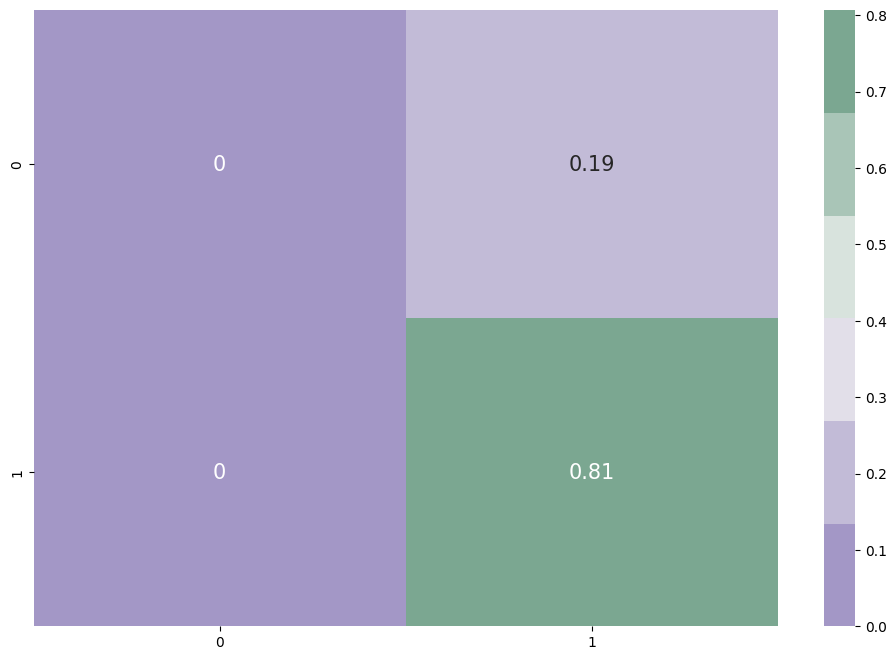

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

    accuracy                           0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

